In [1]:
import tensorflow as tf
import numpy as np
import os
import glob
import cv2
from sklearn import utils
from matplotlib import pyplot as plt

In [2]:
images = []
labels = []
for f in glob.glob("yes/*"):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256,256))
    images.append(np.array(img))
    labels.append(1)
    
for f in glob.glob("no/*"):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256,256))
    images.append(np.array(img))
    labels.append(0)   

In [3]:
from random import randint
def plot_prediction():
    f = randint(0, len(X_test)-1)
    val = float(pred[:][f])
    
    plt.figure(figsize=(3,3))
    plt.imshow(X_test[f], cmap=plt.cm.gray)
    plt.xlabel("Expected : "+str(y_test[f])+", Prediction : "+f"{round(val)}"+f"[{val:.3f}]")
    
    if(val >= .85 ):
        plt.title("Extreme Risk")
    elif(val >=.60 and val <.85):
        plt.title("High Risk")
    elif(val >=.35 and val <.60):
        plt.title("Mild Risk")
    else:
        plt.title("Negligible Risk")
        

In [4]:
len(images)==len(labels)
images = np.array(images)
labels = np.array(labels)

images, labels = utils.shuffle(images, labels)

In [5]:
X_train = images[:200]
X_test = images[200:] 
y_train = labels[:200]
y_test = labels[200:]

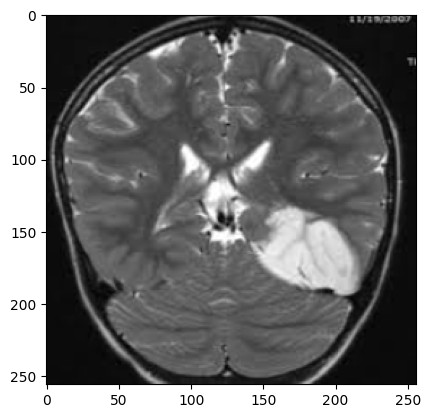

In [6]:
images = images/255
plt.imshow(images[0], cmap=plt.cm.gray)

In [7]:
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256, 1)))
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D((2,2)))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(32, activation='relu'))
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [9]:
model_1.fit(X_train, y_train, epochs=10, use_multiprocessing=True)

Epoch 1/10
7/7 [==============================] - 12s 2s/step - loss: 230.3710 - accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 10s 1s/step - loss: 23.8255 - accuracy: 0.5850
Epoch 3/10
7/7 [==============================] - 10s 1s/step - loss: 1.8029 - accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 10s 1s/step - loss: 0.4248 - accuracy: 0.7300
Epoch 5/10
7/7 [==============================] - 10s 1s/step - loss: 0.2702 - accuracy: 0.8150
Epoch 6/10
7/7 [==============================] - 10s 1s/step - loss: 0.1869 - accuracy: 0.8950
Epoch 7/10
7/7 [==============================] - 10s 1s/step - loss: 0.1066 - accuracy: 0.9700
Epoch 8/10
7/7 [==============================] - 10s 1s/step - loss: 0.0451 - accuracy: 0.9800
Epoch 9/10
7/7 [==============================] - 10s 1s/step - loss: 0.0163 - accuracy: 0.9900
Epoch 10/10
7/7 [==============================] - 10s 1s/step - loss: 0.0121 - accuracy: 0.9900


In [10]:
model_1.evaluate(X_test, y_test)
pred = model_1.predict(X_test[:])

2/2 [==============================] - 1s 331ms/step


In [31]:
plot_prediction()

IndexError: index 53 is out of bounds for axis 0 with size 53

In [16]:
model_1.save("model_1")

INFO:tensorflow:Assets written to: model_1\assets


INFO:tensorflow:Assets written to: model_1\assets


In [17]:
model_1.save("model_1.h5")